# Dataset

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Image Augmentation 

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
xtrain=train_datagen.flow_from_directory("C:/Users/admin/IBM_A/flowers",
                                         target_size=(200,200),
                                         class_mode='categorical',
                                         batch_size=100)

xtest=test_datagen.flow_from_directory("C:/Users/admin/IBM_A/flowers",
                                       target_size=(200,200),
                                       class_mode='categorical',
                                       batch_size=100)

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


# Create Model & Add layers

In [4]:
model = Sequential() #Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(200,200,3)))  #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))  #MaxPooling layer
model.add(Flatten())  #Flatten layer
model.add(Dense(300,activation='relu'))  #Hidden layer 1
model.add(Dense(150,activation='relu'))  #Hidden layer 2
model.add(Dense(5,activation='softmax')) #Output layer

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=15,
                    validation_data=xtest,
                    validation_steps=len(xtest))

C:\Users\admin\AppData\Local\Temp\ipykernel_4412\1550465685.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,


Epoch 1/15
44/44 [==============================] - 387s 8s/step - loss: 7.5547 - accuracy: 0.3491 - val_loss: 1.2334 - val_accuracy: 0.4675
Epoch 2/15
44/44 [==============================] - 335s 8s/step - loss: 1.1337 - accuracy: 0.5508 - val_loss: 1.0067 - val_accuracy: 0.6185
Epoch 3/15
44/44 [==============================] - 239s 5s/step - loss: 0.9892 - accuracy: 0.6176 - val_loss: 0.9405 - val_accuracy: 0.6530
Epoch 4/15
44/44 [==============================] - 245s 5s/step - loss: 0.9253 - accuracy: 0.6433 - val_loss: 0.8310 - val_accuracy: 0.6884
Epoch 5/15
44/44 [==============================] - 338s 8s/step - loss: 0.8657 - accuracy: 0.6701 - val_loss: 0.7816 - val_accuracy: 0.7067
Epoch 6/15
44/44 [==============================] - 309s 7s/step - loss: 0.8310 - accuracy: 0.6778 - val_loss: 0.7628 - val_accuracy: 0.7165
Epoch 7/15
44/44 [==============================] - 313s 7s/step - loss: 0.7905 - accuracy: 0.7056 - val_loss: 0.7341 - val_accuracy: 0.7325
Epoch 8/15
44

# Save the model

In [7]:
model.save('flowers.h5')

Splitting the dataset for testing...

In [8]:
import os
import random
import cv2
path_test = "C:/Users/admin/IBM_A/flowers/"

CATEGORIES = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
IMG_SIZE = 200

training = [] #for creating a random shuffled dataset
def createTrainingData():
  for category in CATEGORIES:
    path = os.path.join(path_test, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training.append([new_array, class_num])

createTrainingData()

In [9]:
random.shuffle(training) #shuffling

In [10]:
X =[]
y =[]
for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [11]:
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 5)
print(Y[100])
print(Y.shape)
print(X.shape)

[0. 1. 0. 0. 0.]
(4317, 5)
(4317, 200, 200, 3)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #splitting

In [13]:
n = int(len(X_test)/2)

x_test, y_test = X_test[n:], y_test[n:]

In [14]:
print(X_test.shape)
print(x_test.shape)
print(y_test.shape)

(864, 200, 200, 3)
(432, 200, 200, 3)
(432, 5)


In [15]:
from tensorflow.keras.models import load_model

model1 = load_model('flowers.h5')
y_test_predict = model1.predict(x_test)

14/14 [==============================] - 10s 356ms/step


In [16]:
y_test_predict = np.argmax(y_test_predict,axis=1)

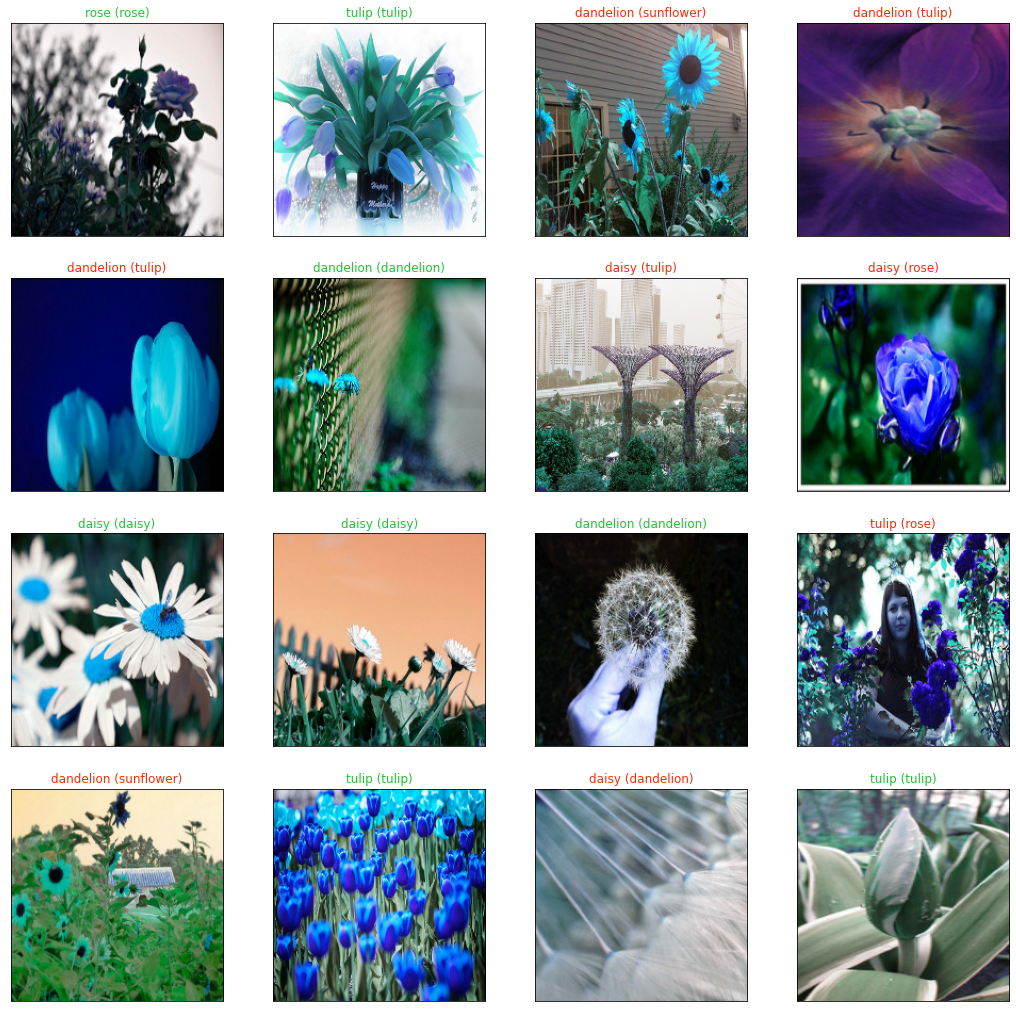

In [17]:
# Display true labels and predictions
fig = plt.figure(figsize=(18, 18))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = y_test_predict[idx]
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(CATEGORIES[pred_idx], CATEGORIES[true_idx]),
                 color=("#23C434" if pred_idx == true_idx else "#F52F05"))